<a href="https://colab.research.google.com/github/abeelashraf98/datascience_laba/blob/main/co5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Necessary Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

#load MNIST dataset available in Keras library
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# To Know No. of Examples in Training Dataset

In [ ]:
# No. of examples in train dataset
print(len(X_train))
# No. of examples in test dataset
print(len(X_test))

60000
10000


In [ ]:
# Give details of an image in the dataset
X_train[0].shape

(28, 28)

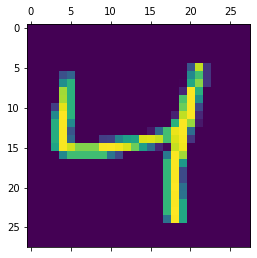

In [ ]:
import matplotlib.pyplot as plt
#matshow() function OR imshow() function is used to represent an array as a matrix in a new figure window. 
#plt.matshow(X_train[0]) OR plt.imshow(X_train[2])
plt.matshow(X_train[2]) 



In [ ]:
#  Scale the values in Xtrain & Xtest 
X_train=X_train/255
X_test=X_test/255
# Display the length of X_train
print(len(X_train))
print(len(X_test))

60000
10000


In [ ]:
# Flattening Xtrain & Xtest to a 2D array
X_train_flattened=X_train.reshape(-1,784)
X_test_flattened=X_test.reshape(-1,784)
#Display the shape of flattened Xtrain & Xtest
X_train_flattened.shape

(60000, 784)

In [ ]:
#Build the model 
model = keras.Sequential([keras.layers.Dense(10,activation='sigmoid')])

# Apply 'adam' optimizer
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train the model using fit(). Give epoch as 10
model.fit(X_train_flattened,y_train,epochs=10)

#Evaluate the model 
model.evaluate(X_test_flattened, y_test)

#Predict the values for flattened test dataset
y_predicted = model.predict(X_test_flattened)

#Display the first row of y_predicted
y_predicted[1]




Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4686 - accuracy: 0.8757
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3028 - accuracy: 0.9154
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2828 - accuracy: 0.9204
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2727 - accuracy: 0.9241
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2661 - accuracy: 0.9257
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2616 - accuracy: 0.9275
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2580 - accuracy: 0.9278
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2550 - accuracy: 0.9290
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2531 - accuracy: 0.9294
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.2682 

array([3.54846954e-01, 4.90453839e-03, 9.99725878e-01, 1.46192163e-01,
       1.42736942e-11, 8.50151122e-01, 8.91904712e-01, 7.03319514e-16,
       1.09118044e-01, 3.64656829e-12], dtype=float32)

In [ ]:
# Display the predicted value by applying argmax()
np.argmax(y_predicted)

#Confirm the prediction by displaying the corresponding pixel values using matshow() ir imshow()
plt.matshow(X_test[1])



In [ ]:
#Display the predicted values  for test dataset. Display only first 5 predicted values
yPredicted = model.predict(X_test_flattened)
yPredicted[0]
#Construct the Confusion Matrix 
yPredictedLabels = [np.argmax(i) for i in yPredicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions = yPredictedLabels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1108,    3,    2,    0,    1,    5,    2,   14,    0],
       [   9,    8,  921,   18,    8,    2,   12,    8,   43,    3],
       [   4,    0,   18,  923,    1,   20,    2,    9,   26,    7],
       [   2,    1,    4,    2,  927,    0,    9,    4,   10,   23],
       [  11,    2,    1,   39,   10,  765,   16,    5,   37,    6],
       [  12,    3,    7,    1,    7,   10,  914,    1,    3,    0],
       [   2,    6,   23,   10,   10,    1,    0,  933,    3,   40],
       [   7,    7,    6,   19,    9,   17,    8,    6,  886,    9],
       [  11,    8,    1,    9,   35,    5,    0,   13,    9,  918]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

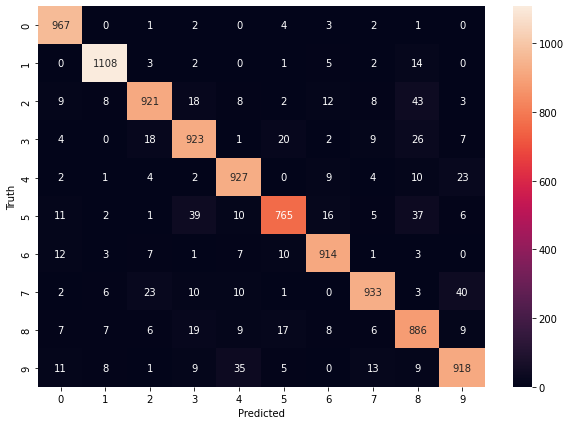

In [ ]:
#Display confusion matrix using heatmap
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

USING HIDDEN LAYER

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2759 - accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1258 - accuracy: 0.9619
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0883 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0670 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0527 - accuracy: 0.9839


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0831 - accuracy: 0.9728


[0.08308100700378418, 0.9728000164031982]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted

array([[2.7470291e-03, 9.8264376e-05, 6.9509625e-02, ..., 9.9997854e-01,
        2.0777166e-01, 1.6348162e-01],
       [6.2189341e-02, 9.5641875e-01, 9.9998629e-01, ..., 4.5592156e-08,
        4.9525359e-01, 2.4854257e-08],
       [1.6140938e-03, 9.8949021e-01, 8.6237818e-02, ..., 2.6670134e-01,
        3.3463070e-01, 8.2600117e-04],
       ...,
       [2.6048295e-07, 5.4158454e-06, 4.6846549e-06, ..., 9.6829849e-01,
        1.1625704e-01, 9.5197463e-01],
       [1.3220429e-02, 5.3649583e-06, 6.7448616e-04, ..., 4.7761202e-04,
        9.9159765e-01, 3.0606985e-04],
       [9.3359733e-01, 3.1404485e-05, 1.3394353e-01, ..., 2.3433216e-07,
        9.8961592e-04, 3.8966537e-04]], dtype=float32)

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [ ]:
y_predicted[0]

array([2.7470291e-03, 9.8264376e-05, 6.9509625e-02, 9.1601360e-01,
       9.0479853e-06, 2.3455888e-02, 6.1543403e-08, 9.9997854e-01,
       2.0777166e-01, 1.6348162e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]


[7, 2, 1, 0, 4]

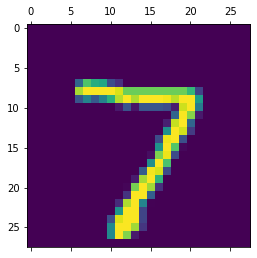

In [ ]:
plt.matshow(X_test[0])

USING FLATTEN LAYER TO CONVERT 2D to 1D

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2730 - accuracy: 0.9229
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1238 - accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0874 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0657 - accuracy: 0.9795
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0515 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0417 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0343 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0285 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0227 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0823 - accuracy: 0.9771


[0.08234710246324539, 0.9771000146865845]